<a href="https://colab.research.google.com/github/Asfak21/Online_Retail_Customer_Segmentation/blob/main/Retail_Customer_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Online Retail Customer Segmentation**


##### **Name** - Asfakullah Layek
##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

### **The goal of this project:**

The goal of customer segmentation is to help you tailor your marketing techniques to meet the specific needs of each customer group and through this form of marketing, you get to interact with your customers more effectively.

Customer segmentation allows you to identify the needs of each segment easily. As a result, it becomes easier to point out groups that need extra attention, those with the highest potential value, those with a high churn rate, etc.

This knowledge helps fine-tune and optimize offerings and products or services to meet your consumers needs and expectations. Such offerings include promotional and sales offers tailored towards specific customer segments.


As a result, businesses can then get a better understanding of things customers could be interested in. This promotes the expansion of new products and services relevant to their target audiences.

This project involves solving a real-world retail problem to identify major customer segments on a transactional dataset by building machine learning algorithms.

### **Summary**

I have summarized the project in 4 steps that how the flow of the project goes:-

**First,** I understood the Online retail dataset in which we are provided with all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Dataset has 541909 rows and 8 columns and there are some duplicate rows which are 5268.
It has missing values in 2 columns - Description and Customer ID. I understood all the variables and how they can be important in cluster segmentation.

**Second,** Dropping the duplicate rows, Dropping Invoice Numbers which starts with 'C' as it indicates a cancellation and dropping the rows having Quantity and Unit Price as negative because they should be positive values. Creating new features - Year, Month, Day and Hour from the Invoice Date column in order to use them for visualization purpose.

In visualization, I started from univariate analysis to bivariate and multivariate analysis in order to understand the relation and impact or importance of the variables. From the visualization, I defined and tested three hypothesis and fail to reject 2 of them and reject the other based on the p-value more or less than the signiicance level(0.05).

**Third,** I have done preprocessing which is important before model implementation. In this, I handled missing values and treated outliers
, some feature engineering selection done to create new features and remove old ones. 

After having selection of important features I transformed some of them and feature scaling. All these were important to be done as they create a great impact on the model performance.     

**Last,** I build different models to cluster the customers on the basis of Recency, Frequency and Monetary value and found the best model as K-Means with k = 2 based on the silhouette score.





# **GitHub Link -**

https://github.com/Asfak21/Online_Retail_Customer_Segmentation

# **Problem Statement**




### In this project, our task is to identify major customer segments on a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## **Data Description**

* ### **InvoiceNo:** Invoice number. This code denotes a cancellation if it begins with the letter "c.".
* ### **StockCode:** Stock Name code for unique product.
* ### **Description:** Description of the Product.
* ### **Quantity:** Quantity bought.
* ### **InvoiceDate:** Invoice date. 
* ### **UnitPrice:** price per unit.
* ### **CustomerID:** Unique customer id
* ### **Country:** Location

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import  libraries

# Import numpy and pandas for data analysis
import numpy as np
import pandas as pd

# Import matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

import math
from datetime import datetime
import datetime as dt

# Import scipy for hypothesis testing
import scipy
from scipy.stats import *



# Import necessary things for pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


# Import ML Algorithms for model implementation
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **CSV file location & reading CSV file**

In [ ]:
# Load Dataset
Retail_Data =pd.read_csv('/content/drive/My Drive/Alma Better/Capstone Project 4/Online Retail.csv')

### Dataset First View

In [ ]:
# Dataset First Look
# First Five Rows
Retail_Data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Last Five Rows
Retail_Data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
Retail_Data.shape

(541909, 8)

### Dataset Information

In [ ]:
# Dataset Info
Retail_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(Retail_Data[Retail_Data.duplicated()])

5268

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
Retail_Data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

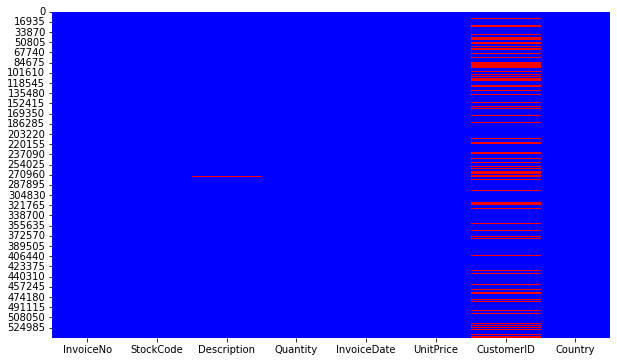

In [ ]:
#plotting graph
# Visualizing the missing values

plt.rcParams['figure.figsize'] = (10, 6)
sns.heatmap(Retail_Data.isnull(), cmap='bwr', cbar=False)

### What did you know about your dataset?

The dataset given is Online Retail excel file and it tells about customers and their transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts.

Dataset has 541909 rows and 8 columns and there are some duplicate rows which are 5268.

It has missing values in 2 columns - Description and Customer ID.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
list(Retail_Data.columns)

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [ ]:
# Dataset Describe
Retail_Data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Observation:** There are many negative values in both Quantity and Unit price which makes mean and minimum value quite bizarre.

### Variables Description 

### There are 8 variables given in the dataset which are as follows : 


* ### InvoiceNo: Invoice number, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. (Nominal)
* ### StockCode: Product (item) code , a 5-digit integral number uniquely assigned to each distinct product. (Nominal)
* ### Description: Product (item) name. (Nominal)
* ### Quantity: The quantities of each product (item) per transaction. (Numeric)
* ### InvoiceDate: Invoice Date and time when each transaction was generated. (Numeric)
* ### UnitPrice: Unit price, Product price per unit in sterling.(Numeric)
* ### CustomerID: Customer number, a 5-digit integral number uniquely assigned to each customer. (Nominal)
* ### Country: Country name, the name of the country where each customer resides. (Nominal)

### Check Unique Values for each variable.

In [ ]:
# Check No. of Unique Values for each variable
for i in list(Retail_Data.columns):
  print(f'No. of unique values in {i} is {Retail_Data[i].nunique()}')

No. of unique values in InvoiceNo is 25900
No. of unique values in StockCode is 4070
No. of unique values in Description is 4223
No. of unique values in Quantity is 722
No. of unique values in InvoiceDate is 23260
No. of unique values in UnitPrice is 1630
No. of unique values in CustomerID is 4372
No. of unique values in Country is 38


In [ ]:
# Check Unique Values for each variable
for i in list(Retail_Data.columns.difference(['Quantity'])):
  print(f'Unique values in {i} is {Retail_Data[i].unique()}\n')

Unique values in Country is ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']

Unique values in CustomerID is [17850. 13047. 12583. ... 13298. 14569. 12713.]

Unique values in Description is ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']

Unique values in InvoiceDate is ['12/1/10 8:26' '12/1/10 8:28' '12/1/10 8:34' ... '12/9/11 12:31'
 '12/9/11 12:49' '12/9/11 12:50']

Unique values in InvoiceNo is ['536365' '536366' '536367' ... '581585' '581586' '581587']

Unique values in StockCode i

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Making a copy of the dataset customer_segment_df for data wrangling
cust_segment_df = Retail_Data.copy() 

In [ ]:
# Drop duplicate rows
cust_segment_df=cust_segment_df.drop_duplicates()

# Dataset Duplicate Value Count
len(cust_segment_df[cust_segment_df.duplicated()])

0

In [ ]:
# Checking the no. of rows of InvoiceNo. which starts with 'C' as it indicates a cancellation
cancel_values=cust_segment_df[cust_segment_df['InvoiceNo'].str.contains('C',na=False)].shape

print(f'\nInvoiceNo. which starts with C as it indicates a cancellation : {cancel_values}')

# Drop InvoiceNo. which starts with 'C' as it indicates a cancellation
cust_segment_df = cust_segment_df[~cust_segment_df['InvoiceNo'].str.contains('C',na=False)]


InvoiceNo. which starts with C as it indicates a cancellation : (9251, 8)


In [ ]:
# Negative values in Quantity column 
neg_quant_values = len(cust_segment_df[cust_segment_df['Quantity'] < 0])

print(f'Negative values in Quantity column  : {neg_quant_values}\n')

# Negative values in Unit Price column 
neg_price_values = len(cust_segment_df[cust_segment_df['UnitPrice'] < 0])

print(f'Negative values in Unit Price column : {neg_price_values}\n')
 
# Selecting only rows where Quantity and Unit Price are positive
cust_segment_df = cust_segment_df[(cust_segment_df['Quantity']>0) & (cust_segment_df['UnitPrice']>0)]

Negative values in Quantity column  : 1336

Negative values in Unit Price column : 2



In [ ]:
# Converting Invoice Date column into datetime format
cust_segment_df["InvoiceDate"] = pd.to_datetime(cust_segment_df["InvoiceDate"], format="%m/%d/%y %H:%M")


# Creating new features - Year, Month, Day and Hour from the Invoice Date column

cust_segment_df["Year"] = cust_segment_df["InvoiceDate"].apply(lambda x: x.year)
cust_segment_df['Month']=cust_segment_df['InvoiceDate'].dt.month_name()
cust_segment_df['Day']=cust_segment_df['InvoiceDate'].dt.day_name()
cust_segment_df["Hour"] = cust_segment_df["InvoiceDate"].apply(lambda x: x.hour)

In [ ]:
# Creating a new feature Total Price by combining(multiplying) Quantity and Unit Price features.
cust_segment_df['Total_Price']= cust_segment_df['Quantity']*cust_segment_df['UnitPrice']

In [ ]:
# Checking the dataset after data wrangling
cust_segment_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34


In [ ]:
# Checking the shape of dataset after data wrangling
cust_segment_df.shape

(524878, 13)

### What all manipulations have you done and insights you found?

Data Manipulations done are :    

1) There are 5268 rows duplicate in the dataset so, dropping the duplicate rows.

2) Dropping Invoice Numbers which starts with 'C' as it indicates a  cancellation and these are not required for data analysis.

3) Dropping the rows having Quantity and Unit Price as negative because they should be positive values.

4) Creating new features - Year, Month, Day and Hour from the Invoice Date column for using them in data visualization. 

5) Creating a new feature Total Price by combining(multiplying) Quantity and Unit Price features.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Top 5 Countries based on number of customers

In [ ]:
# Top 5 Countries based on number of customers
top_5_country=cust_segment_df.groupby(['Country'])['CustomerID'].count().reset_index()
top_5_country.rename(columns={'index': 'Country'}, inplace=True)
top_5_country=top_5_country.sort_values('CustomerID',ascending=False).head()
top_5_country

,Country,CustomerID
36,United Kingdom,349203
14,Germany,9025
13,France,8326
10,EIRE,7226
31,Spain,2479


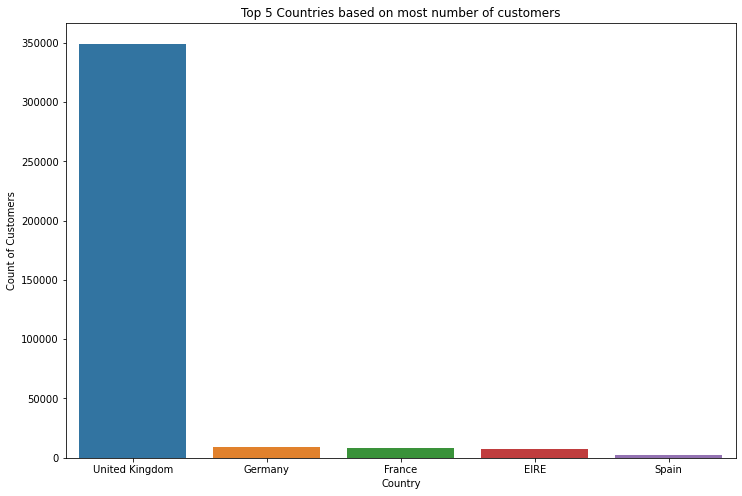

In [ ]:
# Chart - 1 visualization code
# Plotting Barplot 
plt.rcParams['figure.figsize'] = (12, 8)
sns.barplot(x='Country',y='CustomerID',data=top_5_country)
plt.ylabel('Count of Customers')
plt.title("Top 5 Countries based on most number of customers")
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.

##### 2. What is/are the insight(s) found from the chart?

We came to know that :

1) Most number of customers are from United Kingdom(479985).

2) United Kingdom is followed by Germany, France, EIRE and Spain.

#### Chart - 2 Top 5 Country based on least Numbers of Customers

In [ ]:
# Top 5 Country based on least Numbers of Customers
least_5_country=cust_segment_df.groupby(['Country'])['CustomerID'].count().reset_index()
least_5_country.rename(columns={'index': 'Country'}, inplace=True)
least_5_country=least_5_country.sort_values('CustomerID',ascending=False).tail(6)
least_5_country

,Country,CustomerID
22,Lithuania,35
4,Brazil,32
8,Czech Republic,25
2,Bahrain,17
29,Saudi Arabia,9
16,Hong Kong,0


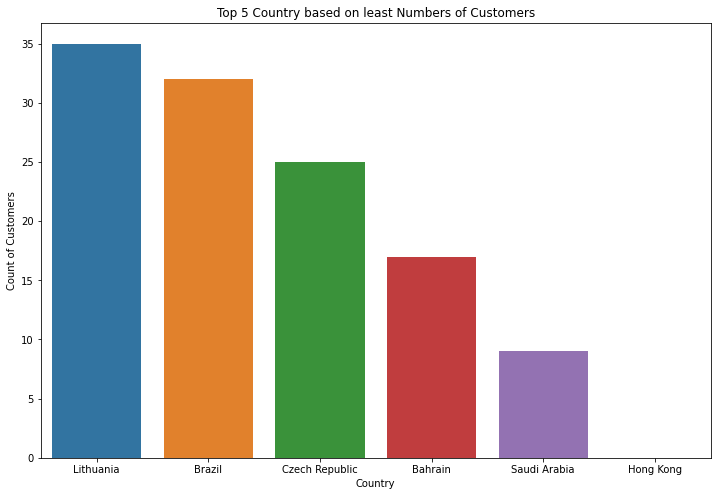

In [ ]:
# Chart - 2 visualization code
# Plotting Barplot 
plt.rcParams['figure.figsize'] = (12, 8)
sns.barplot(x='Country',y='CustomerID',data=least_5_country)
plt.ylabel('Count of Customers')
plt.title("Top 5 Country based on least Numbers of Customers")
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.

##### 2. What is/are the insight(s) found from the chart?

We came to know that :

1) Least number of customers are from Saudi Arabia(9).

2) Saudi Arabia is followed by Bahrain,Czech Republic, Brazil and Lithuania.

#### Chart - 3 Top 5 customers on the basis of Customer ID

In [ ]:
# Top 5 customers on the basis of Customer ID
top_5_customers=cust_segment_df['CustomerID'].value_counts().head()
top_5_customers

17841.0    7676
14911.0    5670
14096.0    5111
12748.0    4412
14606.0    2677
Name: CustomerID, dtype: int64

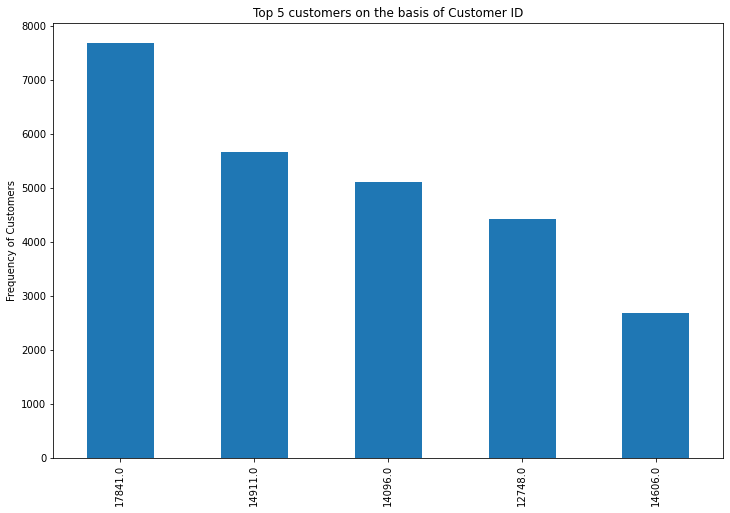

In [ ]:
# Chart - 3 visualization code
# Plotting Barplot 
plt.rcParams['figure.figsize'] = (12, 8)
top_5_customers.plot(kind='bar')
plt.title("Top 5 customers on the basis of Customer ID")
plt.ylabel('Frequency of Customers')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.

##### 2. What is/are the insight(s) found from the chart?

We came to know that :

1) Customer that bought most number of times has Customer ID - 17841

2) Other Customer IDs are 14911, 14096, 12748 and 14606. 

#### Chart - 4  Top 5 Product name that are most bought

In [ ]:
# Top 5 Product name that are most bought
top_5_products=cust_segment_df['Description'].value_counts().reset_index().head()
top_5_products.rename(columns={'index': 'Description_Name'}, inplace=True)
top_5_products.rename(columns={'Description': 'Count'}, inplace=True)
top_5_products

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2311
1,JUMBO BAG RED RETROSPOT,2109
2,REGENCY CAKESTAND 3 TIER,2007
3,PARTY BUNTING,1699
4,LUNCH BAG RED RETROSPOT,1581


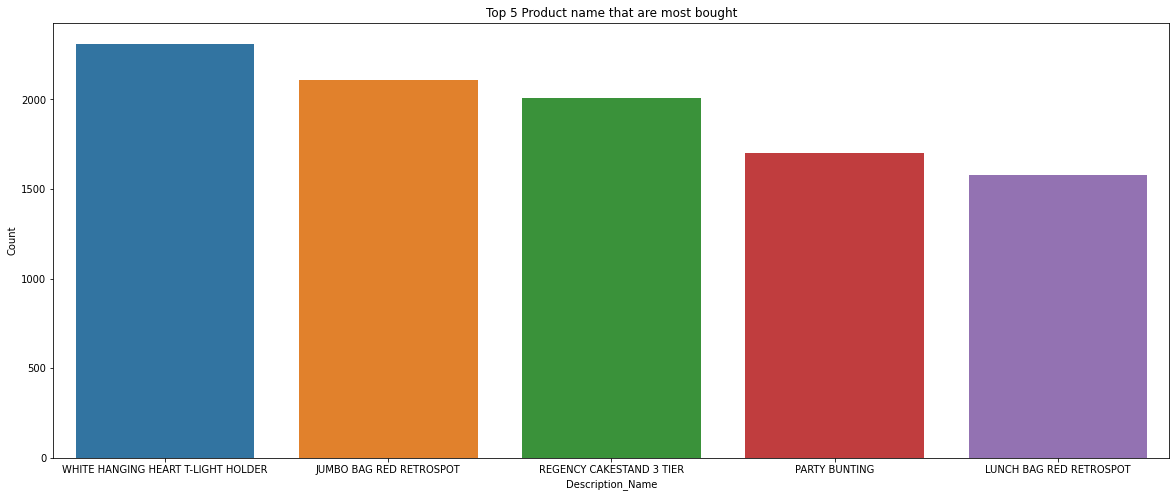

In [ ]:
# Chart - 4 visualization code
# Plotting Barplot
plt.figure(figsize=(20,8))
sns.barplot(x='Description_Name',y='Count',data=top_5_products)
plt.title('Top 5 Product name that are most bought')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.

##### 2. What is/are the insight(s) found from the chart?

We came to know that :

1) Product name that is most bought is White Hanging Heart T-Light Holder

2) It is followed by Jumbo Bag Red Retrospot, Regency Cakestand 3 Tier and Party Bunting .

#### Chart - 5 Top 5 Product name that are least bought

In [ ]:
# Top 5 Product name that are least bought
least_5_products=cust_segment_df['Description'].value_counts().reset_index().tail()
least_5_products.rename(columns={'index': 'Description_Name'}, inplace=True)
least_5_products.rename(columns={'Description': 'Count'}, inplace=True)
least_5_products

,Description_Name,Count
4021,GLASS BEAD HOOP NECKLACE BLACK,1
4022,HOT WATER BOTTLE BABUSHKA LARGE,1
4023,BIRTHDAY BANNER TAPE,1
4024,"GARLAND, MAGIC GARDEN 1.8M",1
4025,"PAPER CRAFT , LITTLE BIRDIE",1


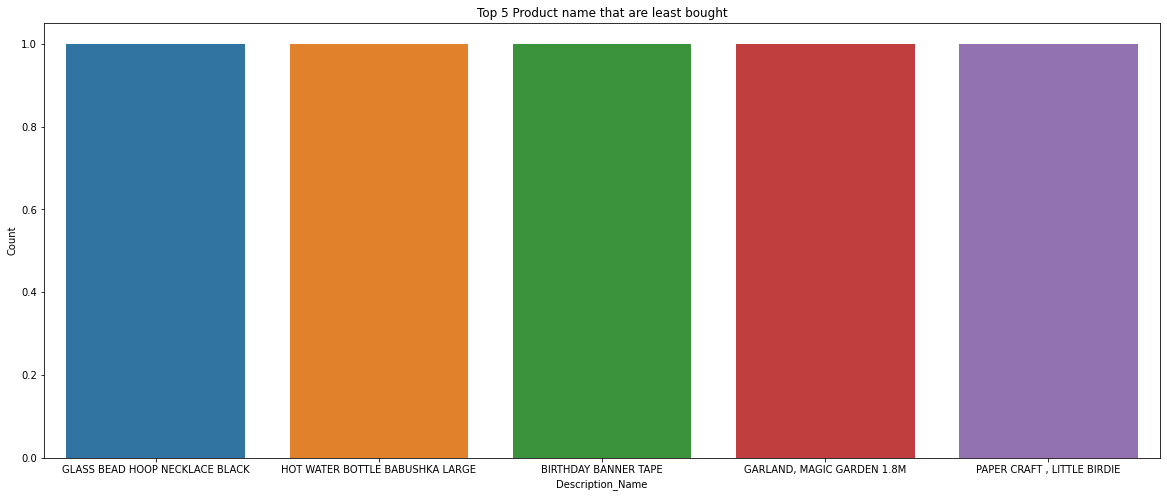

In [ ]:
# Chart - 5 visualization code
# Plotting Barplot
plt.figure(figsize=(20,8))
sns.barplot(x='Description_Name',y='Count',data=least_5_products)
plt.title('Top 5 Product name that are least bought')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.

##### 2. What is/are the insight(s) found from the chart?

We came to know that :

 Product names that are least bought are Glass Bead Hoop Necklace Black, Hot Water Bottle Babushka Large, Birthday Banner Tape and Garland Magic garden 1.8M

#### Chart - 6 Distribution of Quantity

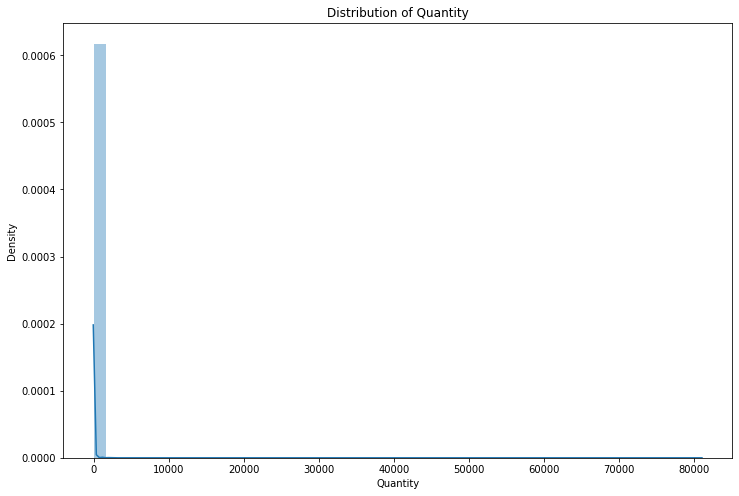

In [ ]:
# Chart - 6 visualization code
# Plotting histogram of distribution of Quantity
plt.figure(figsize=(12,8))
plt.title('Distribution of Quantity')
sns.distplot(cust_segment_df['Quantity'])
plt.show()

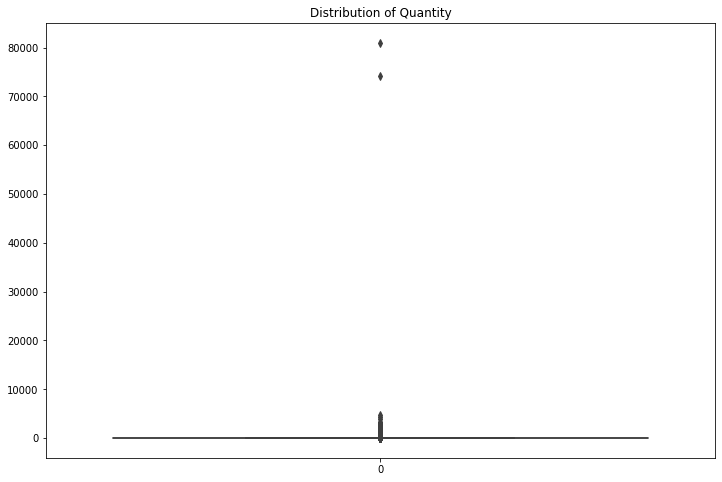

In [ ]:
# Chart - 6 visualization code
# Plotting boxplot of distribution of Quantity
plt.figure(figsize=(12,8))
plt.title('Distribution of Quantity')
sns.boxplot(cust_segment_df['Quantity'])
plt.show()

##### 1. Why did you pick the specific chart?

Histograms are not only useful in determining the minimum data point, maximum data point, and the median. But it is also used to find out the standard median of the data. The range of the chart from left to right, that is also called the class width of the chart, can be found out by using a histogram.


Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.


##### 2. What is/are the insight(s) found from the chart?

We came to know that :

 Distribution of Quantity is positively skewed(right skewed) i.e it has long tail in the right direction so, Quantity variable has outliers.



#### Chart - 7 Distribution of Unit Price

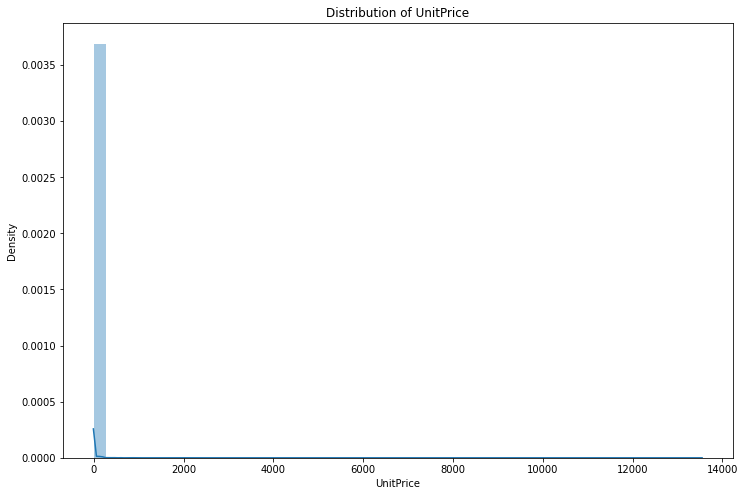

In [ ]:
# Chart - 7 visualization code
# Plotting histogram of distribution of Unit Price
plt.figure(figsize=(12,8))
plt.title('Distribution of UnitPrice')
sns.distplot(cust_segment_df['UnitPrice'])
plt.show()

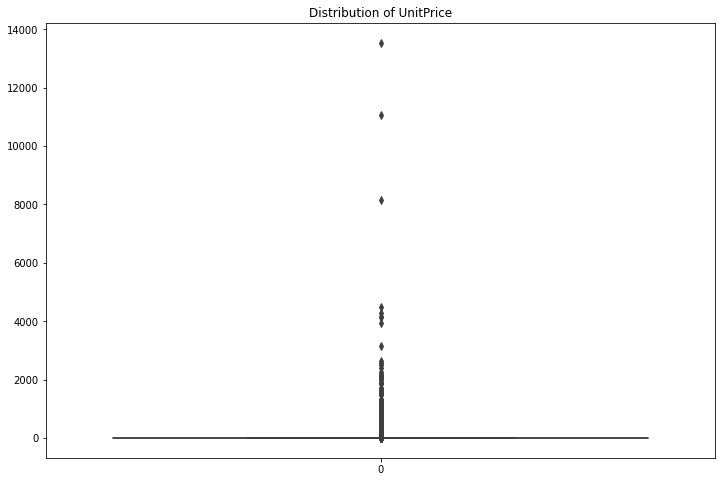

In [ ]:
# Chart - 7 visualization code
# Plotting boxplot of distribution of Unit Price
plt.figure(figsize=(12,8))
plt.title('Distribution of UnitPrice')
sns.boxplot(cust_segment_df['UnitPrice'])
plt.show()

##### 1. Why did you pick the specific chart?

Histograms are not only useful in determining the minimum data point, maximum data point, and the median. But it is also used to find out the standard median of the data. The range of the chart from left to right, that is also called the class width of the chart, can be found out by using a histogram.


Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.


##### 2. What is/are the insight(s) found from the chart?

We came to know that :

Distribution of Unit Price is positively skewed(right skewed) i.e it has long tail in the right direction so, Unit Price variable has outliers.

#### Chart - 8 Months in which most number of customers has bought

In [ ]:
# The Months in which most number of customers has bought
month_df=cust_segment_df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,82004
1,December,65824
2,October,58537
3,September,48900
4,July,38395
5,May,35917
6,June,35716
7,March,35497
8,August,34264
9,January,34060


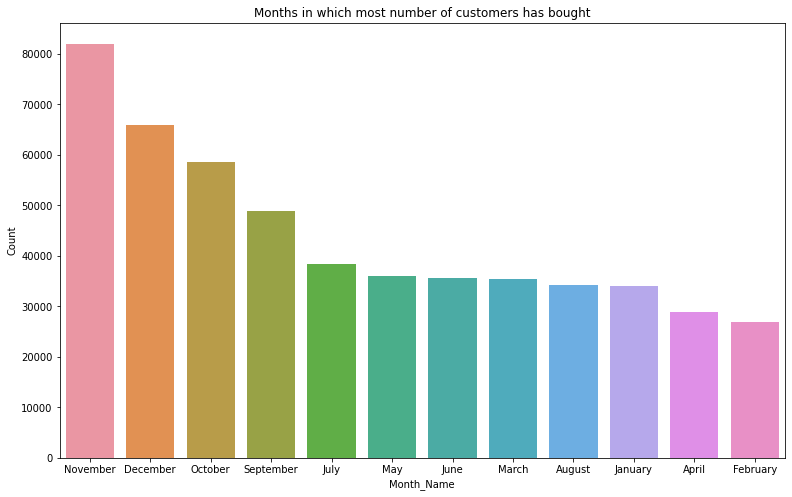

In [ ]:
# Chart - 8 visualization code
# Plotting barplot
plt.figure(figsize=(13,8))
sns.barplot(x='Month_Name',y='Count',data=month_df)
plt.title('Months in which most number of customers has bought')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.

##### 2. What is/are the insight(s) found from the chart?

We came to know that :

1) Months in which most number of customers has bought are November, December, October and September.

2) Months in which least number of customers has bought are February, April, January and August

#### Chart - 9 Days in which most number of customers has bought

In [ ]:
# The Days in which most number of customers has bought
day_df=cust_segment_df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,100213
1,Tuesday,98726
2,Monday,92466
3,Wednesday,91467
4,Friday,79667
5,Sunday,62339


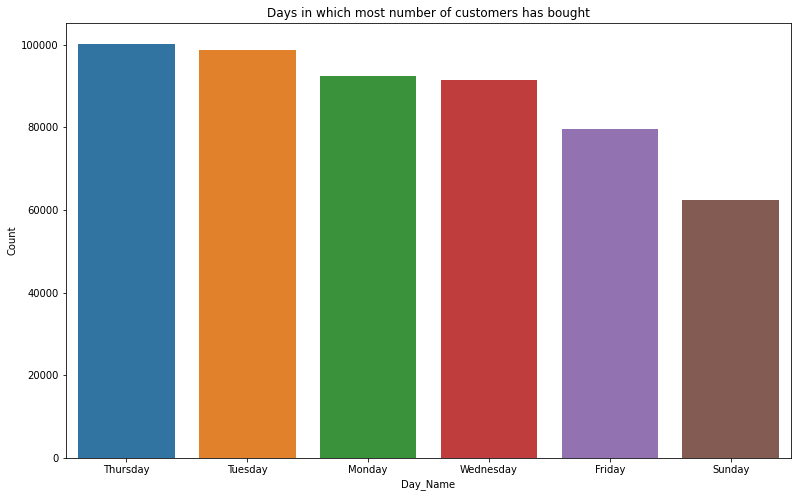

In [ ]:
# Chart - 9 visualization code
# Plotting Barplot
plt.figure(figsize=(13,8))
sns.barplot(x='Day_Name',y='Count',data=day_df)
plt.title('Days in which most number of customers has bought')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.

##### 2. What is/are the insight(s) found from the chart?

We came to know that :

1) Days in which most number of customers has bought are Thursday and Tuesday.

2) Days in which least number of customers has bought are Sunday and Friday.

#### Chart - 10 Peak Hours in which most number of customers has bought

In [ ]:
# Peak Hours in which most number of customers has bought
hour_df=cust_segment_df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'Hour': 'Count'}, inplace=True)
hour_df.head()

,Hour_Name,Count
0,12,75986
1,15,75665
2,13,69993
3,14,65057
4,11,55420


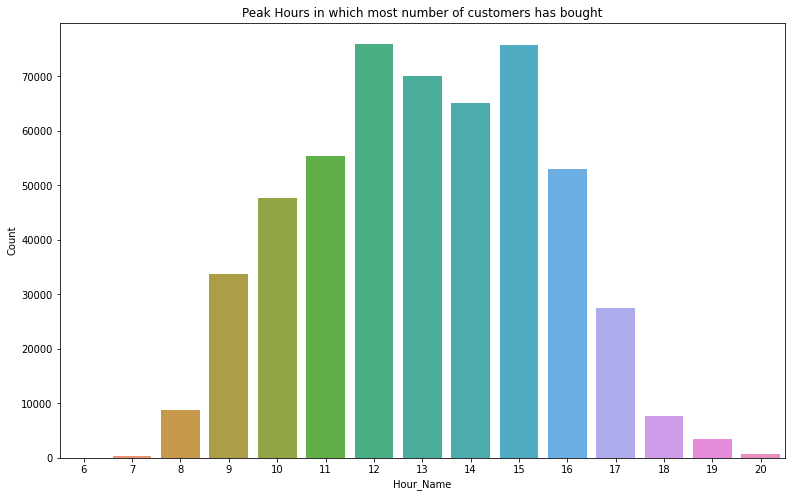

In [ ]:
# Chart - 10 visualization code
# Plotting barplot
plt.figure(figsize=(13,8))
sns.barplot(x='Hour_Name',y='Count',data=hour_df)
plt.title('Peak Hours in which most number of customers has bought')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.

##### 2. What is/are the insight(s) found from the chart?

We came to know that :

 The Peak Hours in which customers has bought the most are around 12 PM to 3 PM.



#### Chart - 11 Top 5 Products having highest sales

In [ ]:
# Top 5 Products having highest sales
high_sales_prod=cust_segment_df.groupby('Description')['Total_Price'].sum().reset_index().head()
high_sales_prod.rename(columns={'Total_Price': 'Sales'}, inplace=True)
high_sales_prod

,Description,Sales
0,4 PURPLE FLOCK DINNER CANDLES,285.70
1,50'S CHRISTMAS GIFT BAG LARGE,2343.63
2,DOLLY GIRL BEAKER,2886.25
3,I LOVE LONDON MINI BACKPACK,1624.02
4,I LOVE LONDON MINI RUCKSACK,4.15


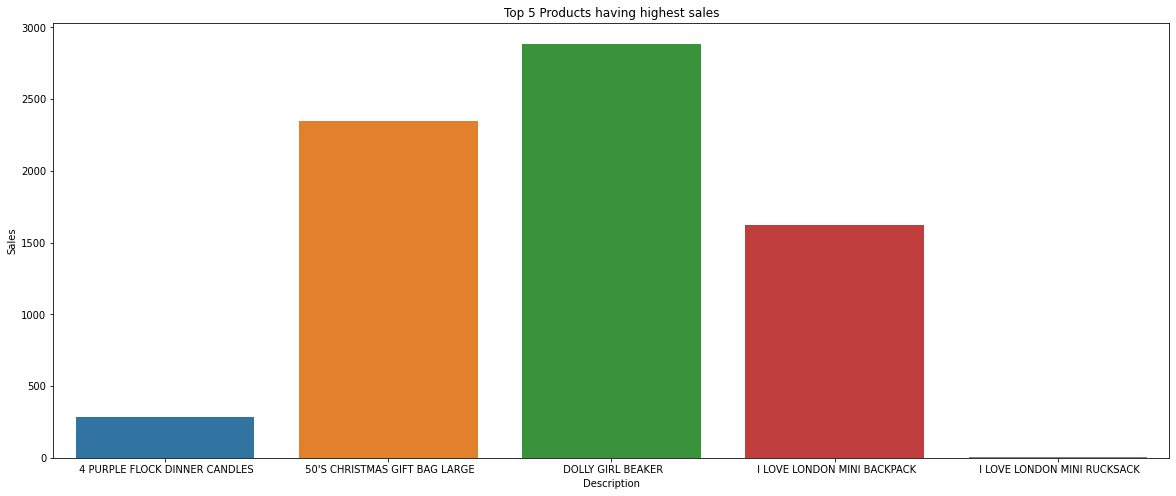

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(20,8))
sns.barplot(x='Description',y='Sales',data=high_sales_prod)
plt.title('Top 5 Products having highest sales')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.

##### 2. What is/are the insight(s) found from the chart?

We came to know that :

1) Product that has the highest sales is Dolly Girl Beaker. 

2) It is followed by 50's Christmas Gift Bag Large and I Love London Mini BackPack

#### Chart - 12 Top 5 Customers having highest sales

In [ ]:
# Top 5 Customers having highest sales
high_sales_cust=cust_segment_df.groupby('CustomerID')['Total_Price'].sum().reset_index().head()
high_sales_cust.rename(columns={'Total_Price': 'Sales'}, inplace=True)
high_sales_cust

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


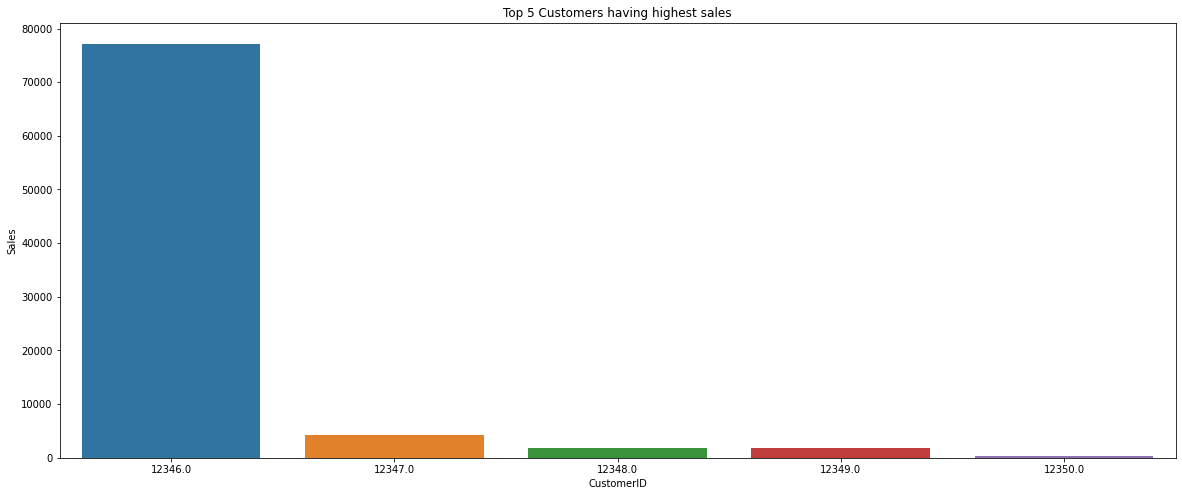

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(20,8))
sns.barplot(x='CustomerID',y='Sales',data=high_sales_cust)
plt.title('Top 5 Customers having highest sales')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.

##### 2. What is/are the insight(s) found from the chart?

We came to know that :

1) Customer ID that has the highest sales is 12346. 

2) It is followed by 12347, 12348, 12349 and 12350.

#### Chart - 13 - Correlation Heatmap

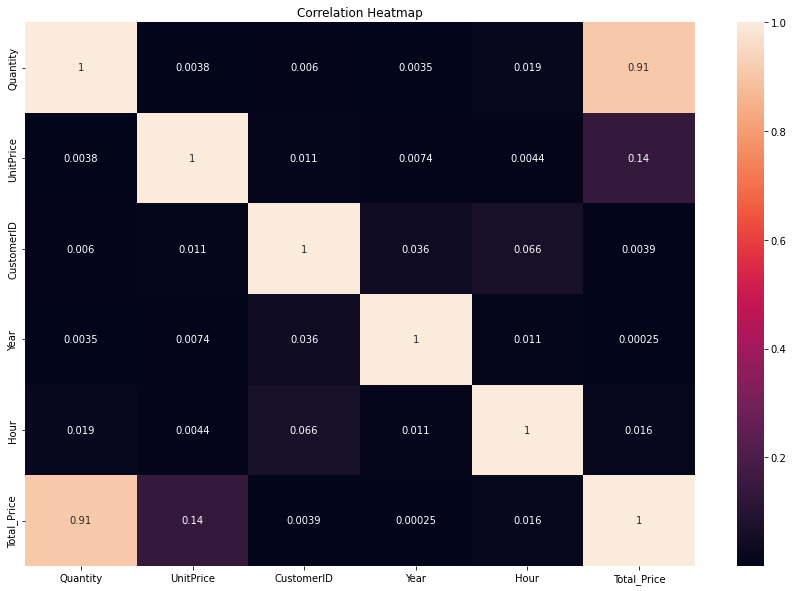

In [ ]:
# Correlation Heatmap visualization code
# Plotting Heatmap
plt.figure(figsize=(15,10))
correlation = cust_segment_df.corr()
sns.heatmap(abs(correlation), annot=True)
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

We came to know that : 

There is no as such correlation between the variables except Total Price and Quantity which is obvious.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Average sales of customers from United Kingdom is less than or equal to average sales of customers from Germany. ( Most number of customers are from United Kingdom and Germany )

2. Average sales in the month of November is less than or equal to average sales in the month of February . ( Most number of customers purchased on November and least of them purchased on February )

3. Average sales on Thursday is less than or equal to average sales on Sunday . ( Most number of customers purchased on Thursday and least of them purchased on Sunday )

### Hypothetical Statement - 1



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


**Null Hypothesis:**   Average sales of customers from United Kingdom is less than or equal to average sales of customers from Germany. ( Most number of customers are from United Kingdom and Germany )

**Alternate Hypothesis :**  Average sales of customers from United Kingdom is more than average sales of customers from Germany

**Test Type:** 2 Sample T-test(Right Tailed Test)

**Significance level** = 0.05

<Axes: xlabel='Total_Price', ylabel='Density'>

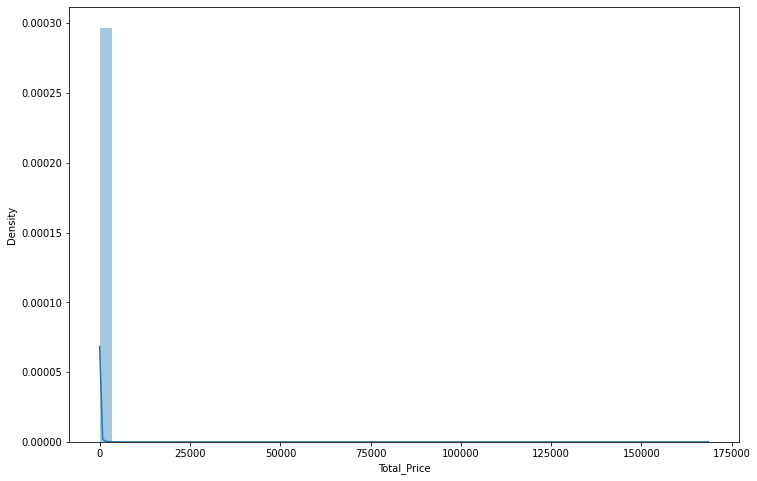

In [ ]:
# Plotting distribution of Total Price column
sns.distplot(cust_segment_df['Total_Price'])

#### 2. Perform an appropriate statistical test.

In [ ]:
# Finding sample size, mean and standard deviation of 2 samples 

n_unitedkingdom = 384   # taking sample size from sample size table
n_germany = 384         # taking sample size from sample size table
x_bar_unitedkingdom = np.mean(cust_segment_df.loc[cust_segment_df['Country']=='United Kingdom','Total_Price'][:384])
x_bar_germany = np.mean(cust_segment_df.loc[cust_segment_df['Country']=='Germany','Total_Price'][:384])
std_unitedkingdom = np.std(cust_segment_df.loc[cust_segment_df['Country']=='United Kingdom','Total_Price'][:384])
std_germany = np.std(cust_segment_df.loc[cust_segment_df['Country']=='Germany','Total_Price'][:384])

In [ ]:
# Ratio of standard deviations of either of 2 samples(should be between 0.5 and 2)
std_unitedkingdom/std_germany

1.9708684591207

In [ ]:
# Calculating pooled standard deviation
sp2_hyp1 = ((n_unitedkingdom-1)*std_unitedkingdom**2 + (n_germany-1)*std_germany**2)/(n_unitedkingdom+n_germany-2)

sp_hyp1 = np.sqrt(sp2_hyp1)

In [ ]:
# Calculating t - value
t_value_hyp1 = (x_bar_unitedkingdom-x_bar_germany)/(sp_hyp1*np.sqrt(1/n_unitedkingdom + 1/n_germany))
t_value_hyp1

1.275975409801876

In [ ]:
# Finding p - value
p1 = round(1 - t.cdf(t_value_hyp1,n_unitedkingdom+n_germany-2),5)
p1

0.10118

As p1 > Significance level(0.05), 
Fail to reject the Null Hypothesis for p = 0.10118

##### Which statistical test have you done to obtain P-Value?

I have used 2 Sample T-Test as the statistical testing to obtain P-Value and found the result that Fail to reject the Null hypothesis and Average sales of customers from United Kingdom is less than or equal to average sales of customers from Germany.

##### Why did you choose the specific statistical test?

From the Total Price distribution we can see that most of the values lie on the left side and tail is on the right side. So, the distribution is positively skewed. For a skewed data Z-Test can't be performed.

Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests and their corresponding confidence intervals can and should be used even for heavily skewed data.

So, I used T-test for hypothesis testing.

### Hypothetical Statement - 2



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



**Null Hypothesis:**  Average sales in the month of November is less than or equal to average sales in the month of February . ( Most number of customers purchased on November and least of them purchased on February )

**Alternate Hypothesis :** Average sales in the month of November is more than average sales in the month of February . 

**Test Type:** 2 Sample T-test(Right Tailed Test)

**Significance level =** 0.05

#### 2. Perform an appropriate statistical test.

In [ ]:
# Finding sample size, mean and standard deviation of 2 samples
n_november = 384        # taking sample size from sample size table
n_february= 384         # taking sample size from sample size table
x_bar_november = np.mean(cust_segment_df.loc[cust_segment_df['Month']=='November','Total_Price'][:384])
x_bar_february = np.mean(cust_segment_df.loc[cust_segment_df['Month']=='February','Total_Price'][:384])
std_november = np.std(cust_segment_df.loc[cust_segment_df['Month']=='November','Total_Price'][:384])
std_february = np.std(cust_segment_df.loc[cust_segment_df['Month']=='February','Total_Price'][:384])

In [ ]:
# Ratio of standard deviations of either of 2 samples(should be between 0.5 and 2)
std_november/std_february

0.9585707037329054

In [ ]:
# Calculating pooled standard deviation
sp2_hyp2 = ((n_november-1)*std_november**2 + (n_february-1)*std_february**2)/(n_november+n_february-2)

sp_hyp2 = np.sqrt(sp2_hyp2)

In [ ]:
# Calculating t - value
t_value_hyp2 = (x_bar_november-x_bar_february)/(sp_hyp2*np.sqrt(1/n_november + 1/n_february))
t_value_hyp2

-0.2578479677560203

In [ ]:
# Finding p - value
p2 = round(1 - t.cdf(t_value_hyp2,n_november+n_february-2),5)
p2

0.6017

As p2 > Significance level(0.05), 
Fail to reject the Null Hypothesis for p = 0.6017

##### Which statistical test have you done to obtain P-Value?

I have used 2 Sample T-Test as the statistical testing to obtain P-Value and found the result that Fail to reject Null hypothesis and Average sales in the month of November is less than or equal to average sales in the month of February .

##### Why did you choose the specific statistical test?

From the Total Price distribution we can see that most of the values lie on the left side and tail is on the right side. So, the distribution is positively skewed. For a skewed data Z-Test can't be performed.

Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests and their corresponding confidence intervals can and should be used even for heavily skewed data.

So, I used T-test for hypothesis testing.

### Hypothetical Statement - 3



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



**Null Hypothesis:**  Average sales on Thursday is less than or equal to average sales on Sunday . ( Most number of customers purchased on Thursday and least of them purchased on Sunday )

**Alternate Hypothesis :** Average sales on Thursday is more than average sales on Sunday . 

**Test Type:** 2 Sample T-test(Right Tailed Test)

**Significance level** = 0.05

#### 2. Perform an appropriate statistical test.

In [ ]:
# Finding sample size, mean and standard deviation of 2 samples
n_thursday= 384        # taking sample size from sample size table
n_sunday= 384          # taking sample size from sample size table
x_bar_thursday = np.mean(cust_segment_df.loc[cust_segment_df['Day']=='Thursday','Total_Price'][:384])
x_bar_sunday = np.mean(cust_segment_df.loc[cust_segment_df['Day']=='Sunday','Total_Price'][:384])
std_thursday = np.mean(cust_segment_df.loc[cust_segment_df['Day']=='Thursday','Total_Price'][:384])
std_sunday = np.mean(cust_segment_df.loc[cust_segment_df['Day']=='Sunday','Total_Price'][:384])

In [ ]:
# Ratio of standard deviations of either of 2 samples(should be between 0.5 and 2)
std_thursday/std_sunday 

1.5717361701974568

In [ ]:
# Calculating pooled standard deviation
sp2_hyp3 = ((n_thursday-1)*std_thursday**2 + (n_sunday-1)*std_sunday**2)/(n_thursday+n_sunday-2)

sp_hyp3 = np.sqrt(sp2_hyp3)

In [ ]:
# Calculating t - value
t_value_hyp3 = (x_bar_thursday-x_bar_sunday)/(sp_hyp3*np.sqrt(1/n_thursday + 1/n_sunday))
t_value_hyp3

6.014151368058553

In [ ]:
# Finding p - value
p3 = round(1 - t.cdf(t_value_hyp3,n_thursday+n_sunday-2),5)
p3

0.0

As p3 < Significance level(0.05), 
Null Hypothesis rejected Successfully for p is close to zero.

##### Which statistical test have you done to obtain P-Value?

I have used 2 Sample T-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Average sales on Thursday is not less than or equal to average sales on Sunday .


##### Why did you choose the specific statistical test?

From the Total Price distribution we can see that most of the values lie on the left side and tail is on the right side. So, the distribution is positively skewed. For a skewed data Z-Test can't be performed.

Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests and their corresponding confidence intervals can and should be used even for heavily skewed data.

So, I used T-test for hypothesis testing.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Making a copy of dataset cust_segment_df for Pre-processing
cust_seg_df = cust_segment_df.copy() 

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Checking missing values in each column(as percentage)
round(cust_seg_df.isnull().sum()/len(cust_seg_df)*100,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.00
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     25.18
Country         0.00
Year            0.00
Month           0.00
Day             0.00
Hour            0.00
Total_Price     0.00
dtype: float64

In [ ]:
# dropping the rows which are having missing Customer ID's.
cust_seg_df.dropna(inplace=True)

In [ ]:
# Checking the shape of dataset
cust_seg_df.shape

(392692, 13)

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have missing values in the Customer ID column only and we can't replace missing Customer ID's by some random or particular customer ID's as we don't know which customers have done those transactions so, dropping the rows which are having missing Customer ID's.

### 2. Handling Outliers

In statistics, an outlier is a data point that differs significantly from other observations. Outliers can occur by chance in any distribution, but they often indicate either measurement error or that the population has a heavy-tailed distribution.

Z-score is a statistical measure that tells you how far is a data point from the rest of the dataset. In a more technical term, Z-score tells how many standard deviations away a given observation is from the mean.

z = (x-mean)/standard deviation

Total number of Outliers present in the Total_Price column are 342.


[Text(0.5, 1.0, 'Outliers Distribution')]

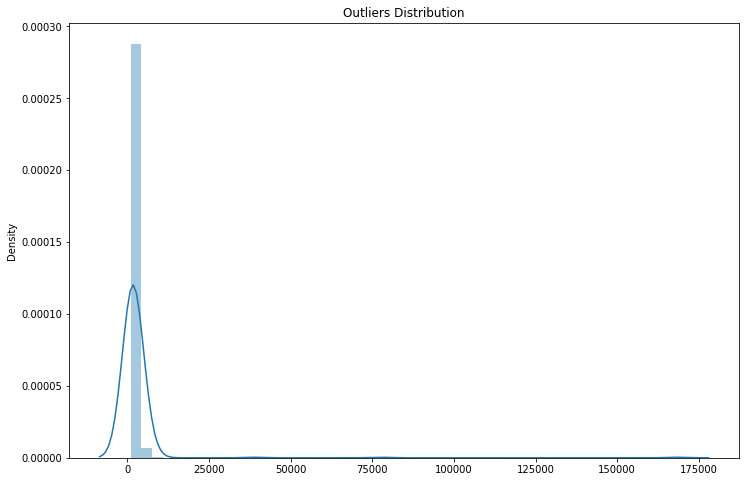

In [ ]:
# Handling Outliers & Outlier treatments
# Detecting Outliers
mean_sales = np.mean(cust_seg_df['Total_Price']) # mean
std_sales = np.std(cust_seg_df['Total_Price'])   # standard deviation

# More than 3 standard deviation is considered an outlier
threshold = 3

# code to identify them
outliers = []
for value in cust_seg_df['Total_Price']:
    z_score = (value-mean_sales)/std_sales
    if z_score > threshold: # threshold value
        outliers.append(value)

# Total number of outliers   
print(f'Total number of Outliers present in the Total_Price column are {len(outliers)}.')

# Plotting the outlier distribution
sns.distplot(outliers).set(title='Outliers Distribution')

In [ ]:
# Finding threshold sales value
threshold_sales_outlier=3*std_sales+mean_sales
threshold_sales_outlier

955.9279844058815

In [ ]:
# Dataframe having outliers
sales_outliers = cust_seg_df.loc[cust_seg_df['Total_Price']> threshold_sales_outlier]
sales_outliers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Total_Price
870,536477,21137,BLACK RECORD COVER FRAME,480,2010-12-01 12:27:00,3.39,16210.0,United Kingdom,2010,December,Wednesday,12,1627.2
2364,536584,84029E,RED WOOLLY HOTTIE WHITE HEART.,384,2010-12-01 16:22:00,2.95,13777.0,United Kingdom,2010,December,Wednesday,16,1132.8
4505,536785,22423,REGENCY CAKESTAND 3 TIER,144,2010-12-02 15:22:00,10.95,15061.0,United Kingdom,2010,December,Thursday,15,1576.8
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom,2010,December,Thursday,16,1003.2
4946,536830,21915,RED HARMONICA IN BOX,1400,2010-12-02 17:38:00,1.06,16754.0,United Kingdom,2010,December,Thursday,17,1484.0


In [ ]:
# Checking shape of outliers dataframe
sales_outliers.shape

(342, 13)

In [ ]:
# Checking shape in outlier dataframe when 
# Month is November (Month in which most customers purchased),
# Day of the week is Thursday (Day in which most customers purchased),
# Hour of the day is from 12 to 3 PM (Peak hours during which most customers purchased)

sales_outliers.loc[(cust_seg_df['Month']=='November') | (cust_seg_df['Day']=='Thursday') | (cust_seg_df['Hour']>=12) | (cust_seg_df['Hour']<=15)].shape

(342, 13)

##### What all outlier treatment techniques have you used and why did you use those techniques?


The primary reasons for the outliers are Month, Day of the week and Hours during which most number of customers purchased : 

1) Month is November (Month in which most customers purchased) 

2) Day of the week is Thursday (Day in which most customers purchased) 

3) Hour of the day is from 12 to 3 PM (Peak hours during which most customers purchased)

If the outliers are a valid occurrence it would be wise not to treat them by deleting or manipulating them especially when we have established the ups and downs in relation to the features. It is well established that there is seasonality involved so, the outliers are not removed as they play an important role in understanding the data.

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

####**RFM Analysis**

#### RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

#### Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: 

#### Recency (R): Days since last purchase
#### Frequency (F): Total number of purchases
#### Monetary Value (M): Total money this customer spent.

#### We will create these 3 customer attributes for each customer.

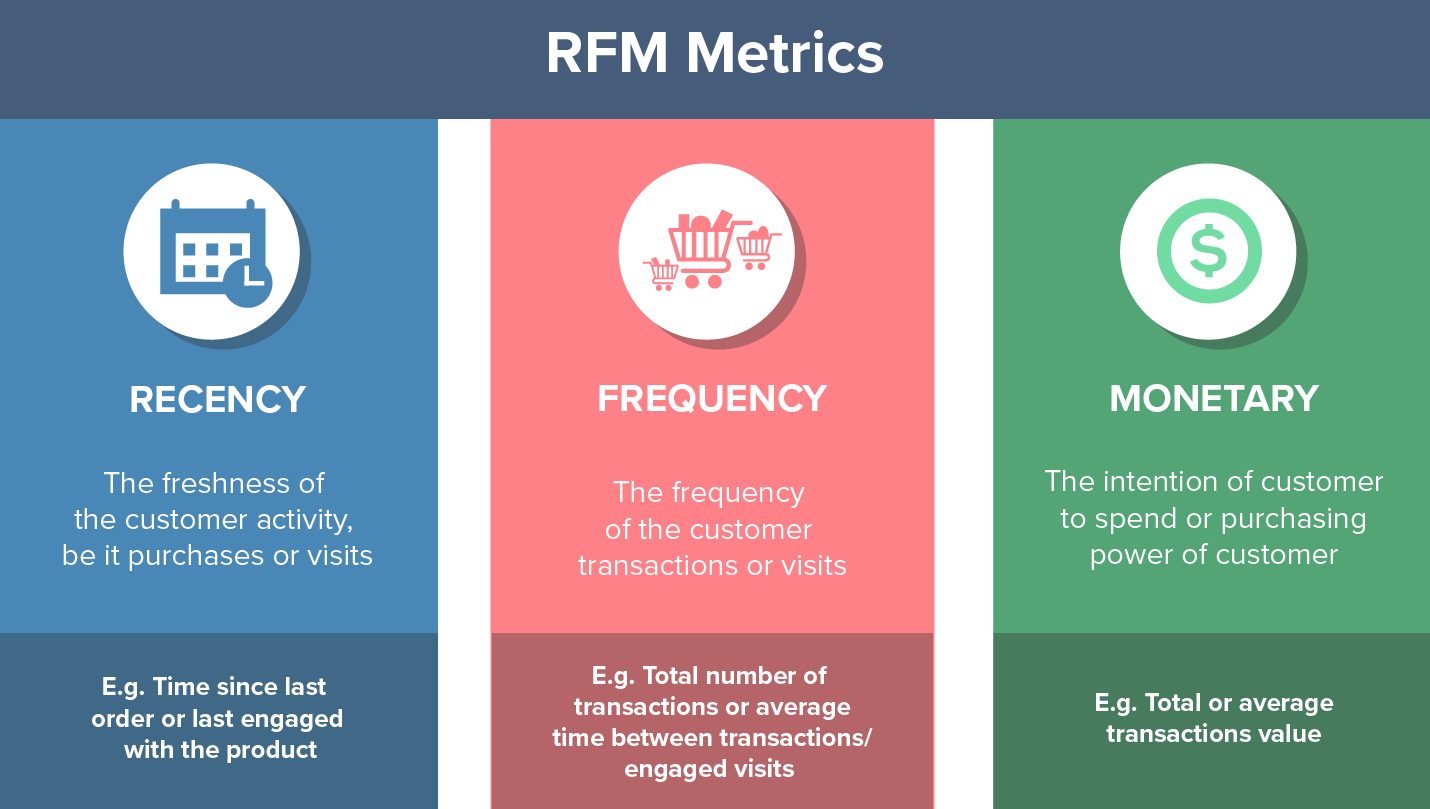

In [ ]:
 
# import datetime library
import datetime as dt

# Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

# Create RFM Modelling scores for each customer
rfm_df = cust_seg_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days,  # Recency = Latest Date - Last Invoice Date
                                                'InvoiceNo': lambda x: len(x),                          # Frequency = count of invoice no. of transaction(s)
                                                'Total_Price': lambda x: x.sum()})                      # Monetary = Sum of Total Price

# Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Total_Price': 'Monetary'}, inplace=True)

# checking the rfm_df dataset
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


####**Calculating RFM scores**

#### The number is typically 3 or 4. If you decide to code each RFM attribute into 3 categories, you'll end up with 27 different coding combinations ranging from a high of 333 to a low of 111. Generally speaking, the higher the RFM score, the more valuable the customer.

#### Dividing each RFM attribute into 4 categories using quartiles :

#### The easiest way to split metrics into segments is by using quartiles. This gives us a starting point for detailed analysis and 4 segments are easy to understand and explain.

In [ ]:
# Split into four segments using quartiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.48249999999996,
  0.5: 668.5700000000002,
  0.75: 1660.5974999999999}}

In [ ]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


#### 2. Feature Selection

##### What all feature selection methods have you used  and why?

We have selected **Recency** (Days since last purchase), **Frequency** (Total number of purchases) and **Monetary value** (Total money this customer spent) of the customer as they help in dividing customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

### 4. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

As all the three features selected are numerical so, no categorical encoding is required.

### 5. Data Transformation

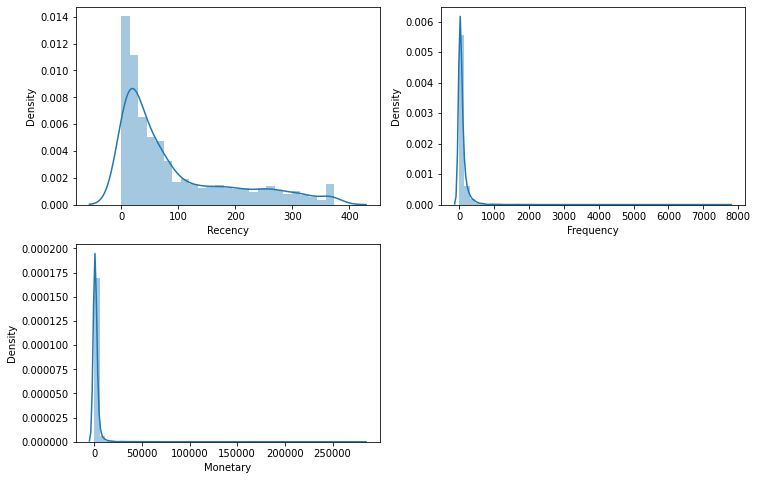

In [ ]:
# Plot distributions 
plt.subplot(2,2,1)
sns.distplot(rfm_df['Recency'])
plt.subplot(2,2,2)
sns.distplot(rfm_df['Frequency'])
plt.subplot(2,2,3)
sns.distplot(rfm_df['Monetary'])
plt.show()

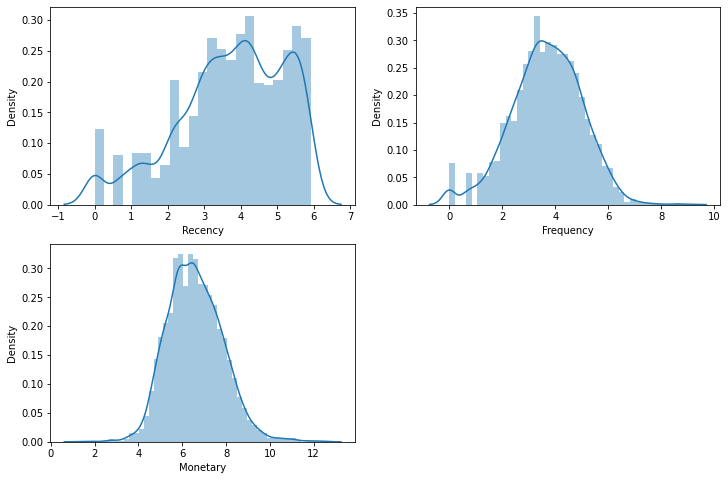

In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
        
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df['Recency']]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df['Monetary']]

# Transform Your data
plt.subplot(2,2,1)
sns.distplot(np.log(rfm_df['Recency']))
plt.subplot(2,2,2)
sns.distplot(np.log(rfm_df['Frequency']))
plt.subplot(2,2,3)
sns.distplot(np.log(rfm_df['Monetary']))
plt.show()

In [ ]:
#Perform Log transformation to bring data into normal or near normal distribution
rfm_log_df = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [ ]:
# Checking the rfm_log_df dataset
rfm_log_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.784,0.000,11.254
12347.0,0.693,5.204,8.369
12348.0,4.317,3.434,7.494
12349.0,2.890,4.290,7.472
12350.0,5.737,2.833,5.812


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Features needed to be transformed to make it gaussian(normal) distribution to have more accurate predictions and that are Recency, Frequency and Monetary.

We have applied non-linear transformations i.e log-transformation on these features to make them gaussian distribution.
Recency feature is transformed to gaussian approximately.

### 6. Data Scaling

##### Which method have you used to scale you data and why?

After applying Logarithmic transformation, all the three features transformed to normal distribution and also scaled simultaneously and lie in same ranges. So, no scaling is required.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

##### Do you think that dimensionality reduction is needed? Explain Why?

As per my knowledge, for this dataset dimensionality reduction is not required.

For this dataset, there are not many features but some 10 to 15 features and most of them are important in predicting the sales. I have 
identified those highly correlated variables and combined them to create new features and variables which are not related to the target variable and dropped them.

In large datasets, very often the variables are highly correlated. The very purpose of applying dimension reduction techniques like PCA is to identify those highly correlated variables or variables which are not related to the target variable and drop them out from further analysis.

Having highly correlated variables leads to overfitting and hence the accuracy of the model will suffer. 

So, it is good to do the dimensionality reduction wherever possible but here it is not required.

## ***7. ML Model Implementation***

### Implementing K-Means Clustering Algorithm

In [ ]:
# Importing things for visualizing clusters and evaluation metric - silhouette score 

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

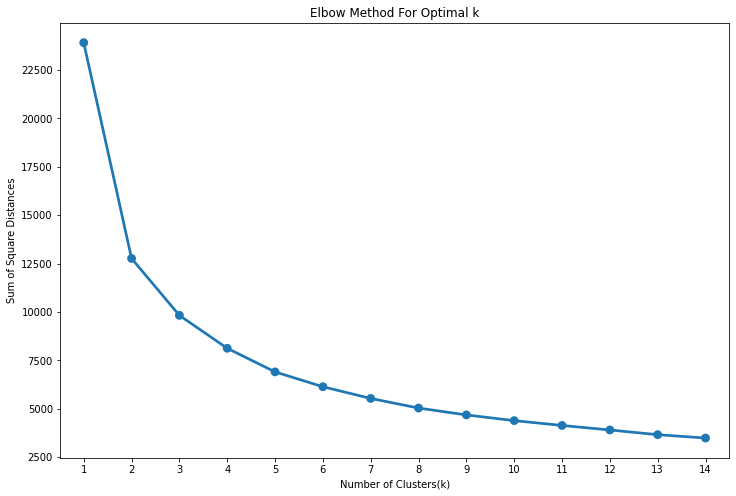

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm 

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k)
    km = km.fit(rfm_log_df)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph between sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


The optimium number of clusters seems to be 3.

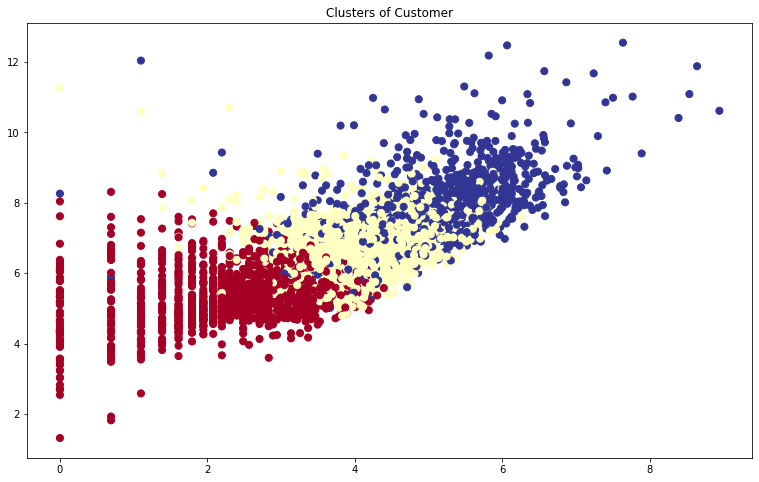

In [ ]:
# Fitting the K-Means clustering model
KMeans_elbow = KMeans(n_clusters= 3,init = 'k-means++',n_init =10,max_iter=300,random_state=0)
KMeans_elbow.fit(rfm_log_df)

# Predict on the model
y_kmeans_elbow = KMeans_elbow.predict(rfm_log_df)

# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(rfm_log_df.iloc[:, 1], rfm_log_df.iloc[:, 2], s = 50, c = y_kmeans_elbow, cmap='RdYlBu')
plt.title('Clusters of Customer')
plt.show()

In [ ]:
# Visualizing evaluation Metric Score chart
# Creating an empty dataframe
summary_df=pd.DataFrame()

# Creating a function summary
def summary(model_name,model,k):
  ''' This function is used to make a summary dataframe showing model name, no. of clusters and evaluation metric(silhouette score) in each row '''

  # Defining variable as global
  global summary_df

  # Fitting the Model and Making Predictions
  y_pred=model.fit_predict(rfm_log_df)

  
  # Finding evaluation metric(Silhouette Score)
  score = silhouette_score(rfm_log_df, y_pred)
  

  # Columns needed to create summary dataframe
  # 2 lists created
  columns = ['Model_Name','Number of Clusters','Silhouette Score']
  row = [{model_name}, k, score]

  # Making a dictionary of 2 lists
  summary_dict = dict(zip(columns,row))

  # Appending dictionary to dataframe
  summary_df=summary_df.append(summary_dict,ignore_index=True)

  return summary_df

In [ ]:
# Applying function summary to create score chart
summary('K-Means with Elbow Method',KMeans_elbow,3)

,Model_Name,Number of Clusters,Silhouette Score
0,{K-Means with Elbow Method},3,0.305388


In [ ]:
# Finding silhouette score for range of k-values
for k in range(2,10):
    km = KMeans(n_clusters= k)

    
    preds = km.fit_predict(rfm_log_df)
    

    score = silhouette_score(rfm_log_df, preds)
    print("For n_clusters = {}, silhouette score is {}".format(k, score))

For n_clusters = 2, silhouette score is 0.39583648510386477
For n_clusters = 3, silhouette score is 0.30510110931176054
For n_clusters = 4, silhouette score is 0.30898924822086615
For n_clusters = 5, silhouette score is 0.2815510392929647
For n_clusters = 6, silhouette score is 0.2853239910269871
For n_clusters = 7, silhouette score is 0.270819991295417
For n_clusters = 8, silhouette score is 0.2681746352894814
For n_clusters = 9, silhouette score is 0.2694278039840505


The optimium number of clusters seems to be 2.

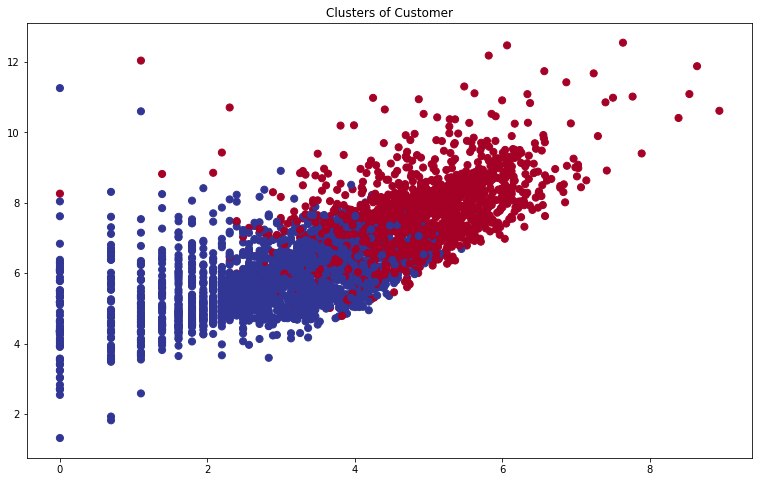

In [ ]:
# Fitting the K-Means clustering model
KMeans_score = KMeans(n_clusters= 2,init = 'k-means++',n_init =10,max_iter=300,random_state=0)
KMeans_score.fit(rfm_log_df)

# Predict on the model
y_kmeans_score = KMeans_score.predict(rfm_log_df)

# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(rfm_log_df.iloc[:, 1], rfm_log_df.iloc[:, 2], s = 50, c = y_kmeans_score, cmap='RdYlBu')
plt.title('Clusters of Customer')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I have used K-Means Clustering algorithm which is an unsupervised learning method for clustering data points. The algorithm iteratively divides data points into K clusters by minimizing the variance in each cluster. I have used it to cluster the customers on the basis of Recency, Frequency and Monetary value.

I have used Elbow method and Silhouette score to determine the best number of clusters i.e K value. I got K=3 by Elbow method and K=2 by Silhouette score. 

For K=3 , Silhouette score is 0.30(round off to 2 decimals)

For K=2 , Silhouette score is 0.40(round off to 2 decimals)

In [ ]:
# Applying function summary to update score chart
summary('K-Means with Silhouette Score',KMeans_score,2)

,Model_Name,Number of Clusters,Silhouette Score
0,{K-Means with Elbow Method},3,0.305388
1,{K-Means with Silhouette Score},2,0.395631


#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

I have used hyperparameters during implementation of the model. The hyperparameters used were:

1) **'init' -** Method for initialization : selects initial cluster centroids using sampling based on an empirical probability distribution of the points contribution to the overall inertia. (default='k-means++')

2) **'n_init'** - Indicates the number of times K-Means would run with different sets of starting points. (default=10)

3) **'random_state'** is used to make sure that the clusters are reproducible.

4) **max_iter** : Maximum number of iterations of the k-means algorithm for a single run. (default=300).

I have used the default values of hyperparameters as dataset provided is large enough. 

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Silhouette Index –**

Silhouette analysis refers to a method of interpretation and validation of consistency within clusters of data. The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

Calculation of Silhouette Value –

If the Silhouette index value is high, the object is well-matched to its own cluster and poorly matched to neighbouring clusters. The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient is defined as –

S(i) = ( b(i) – a(i) ) / ( max { ( a(i), b(i) ) }

Where,

a(i) is the average dissimilarity of ith object to all other objects in the same cluster
b(i) is the average dissimilarity of ith object with all objects in the closest cluster.

Range of Silhouette Value –

Now, obviously S(i) will lie between [-1, 1] –

If silhouette value is close to 1, sample is well-clustered and already assigned to a very appropriate cluster.

If silhouette value is about to 0, sample could be assign to another cluster closest to it and the sample lies equally far away from both the clusters. That means it indicates overlapping clusters

If silhouette value is close to –1, sample is misclassified and is merely placed somewhere in between the clusters.


###  Implementing Heirarchial Clustering Algorithm

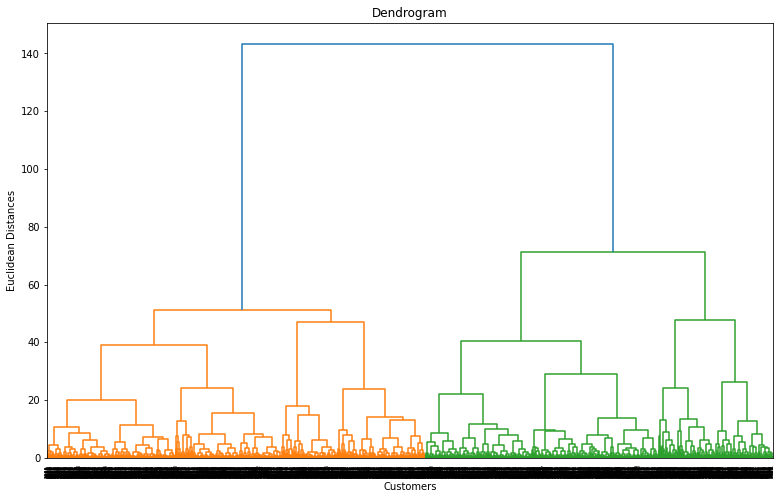

In [ ]:
# Using the dendogram to find the optimal number of clusters

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(rfm_log_df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()                        # find largest vertical distance we can make without crossing any other horizontal line

#### **The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold=100**

#### **No. of Cluster = 2**

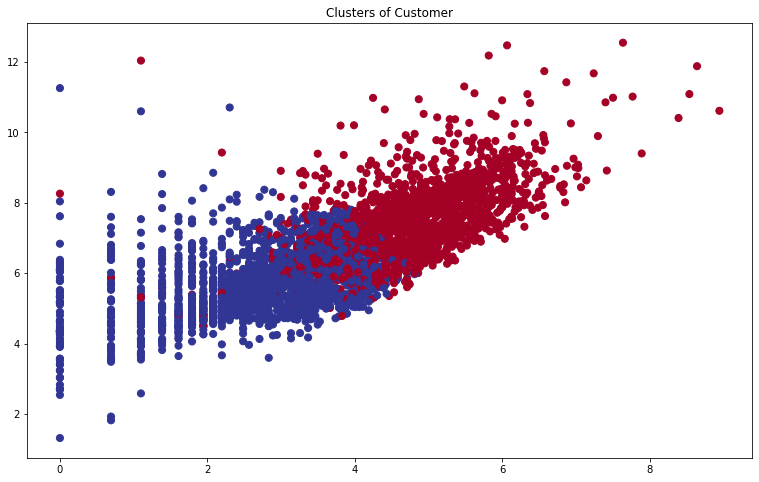

In [ ]:
# Fitting hierarchical clustering to the dataset

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(rfm_log_df)

# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(rfm_log_df.iloc[:, 1], rfm_log_df.iloc[:, 2], s = 50, c = y_hc, cmap='RdYlBu')
plt.title('Clusters of Customer')
plt.show()

In [ ]:
# Finding silhouette score
k=2
hc_score = silhouette_score(rfm_log_df, y_hc)
print("For n_clusters = {}, silhouette score is {}".format(k, hc_score))

For n_clusters = 2, silhouette score is 0.35116976635233244


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I have used Hierarchial Clustering algorithm which is a popular method for grouping objects. It creates groups so that objects within a group are similar to each other and different from objects in other groups. Clusters are visually represented in a hierarchical tree called a dendrogram. I have used it to cluster the customers on the basis of Recency, Frequency and Monetary value.

I have used Agglomerative Clustering and used the threshold value = 100 to determine the best number of clusters i.e K value. I got K=2 and silhouette score for K=2 is 0.35(round off to 2 decimals)



In [ ]:
# Visualizing evaluation Metric Score chart
summary('Heirarchial Clustering with Ward linkage',hc,2)

,Model_Name,Number of Clusters,Silhouette Score
0,{K-Means with Elbow Method},3,0.305388
1,{K-Means with Silhouette Score},2,0.395631
2,{Heirarchial Clustering with Ward linkage},2,0.351170


#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

I have used hyperparameters during implementation of the model. The hyperparameters used were:

1) **Affinity :** The Distance Metric used to find distance between the data points. Choices are avaliable : euclidean, manhattan, minkowskwi

2) **Linkage :** The linkage criterion is responsible for selecting the distance between sets of observations.  Sklearn.cluster.AgglomeratriveClustering will merge pairs into a cluster if it minimizes the linkage criterion.  When using sklearn, the following linkage choices are available: Ward (this is the default),  complete, average and single.  

I have used affinity as euclidean and linkage as ward because ward linkage is less influenced by the noise and outliers and dataset provided has noise and outliers.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Silhouette Index –**

Silhouette analysis refers to a method of interpretation and validation of consistency within clusters of data. The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

Calculation of Silhouette Value –

If the Silhouette index value is high, the object is well-matched to its own cluster and poorly matched to neighbouring clusters. The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient is defined as –

S(i) = ( b(i) – a(i) ) / ( max { ( a(i), b(i) ) }

Where,

a(i) is the average dissimilarity of ith object to all other objects in the same cluster
b(i) is the average dissimilarity of ith object with all objects in the closest cluster.

Range of Silhouette Value –

Now, obviously S(i) will lie between [-1, 1] –

If silhouette value is close to 1, sample is well-clustered and already assigned to a very appropriate cluster.

If silhouette value is about to 0, sample could be assign to another cluster closest to it and the sample lies equally far away from both the clusters. That means it indicates overlapping clusters

If silhouette value is close to –1, sample is misclassified and is merely placed somewhere in between the clusters.


### Implementing DBSCAN(Density-Based Spatial Clustering of Applications with Noise) Algorithm

Text(0, 0.5, 'Epsilon')

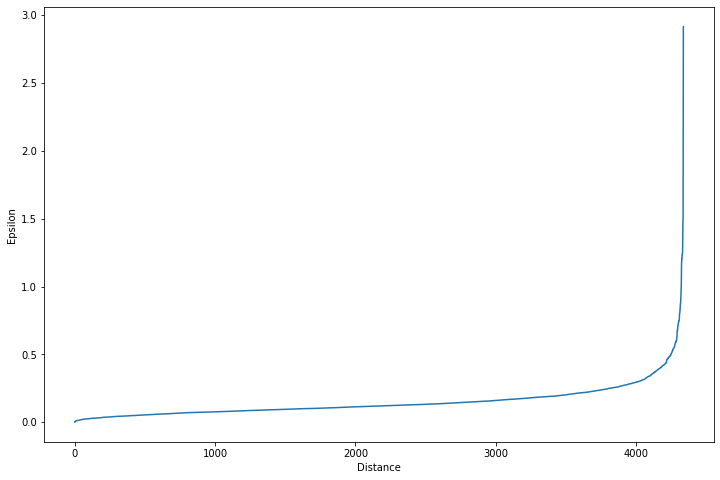

In [ ]:
# We use nearestneighbors for calculating distance between points
from sklearn.neighbors import NearestNeighbors

# Calculating distances
neigh=NearestNeighbors(n_neighbors=10)
distance=neigh.fit(rfm_log_df)

# indices and distance values
distances,indices=distance.kneighbors(rfm_log_df)

# Now sorting the distance increasing order
sorting_distances=np.sort(distances,axis=0)

# sorted distances
sorted_distances=sorting_distances[:,1]

# plot graph between distance vs epsilon
plt.plot(sorted_distances)
plt.xlabel('Distance')
plt.ylabel('Epsilon')


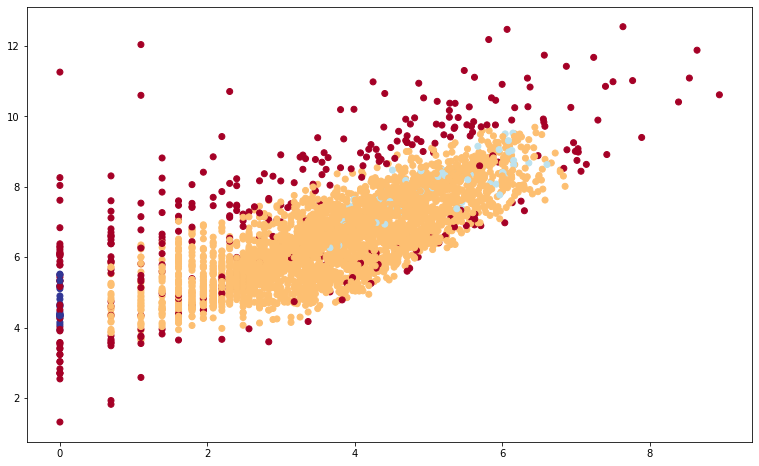

In [ ]:
# Applying DBSCAN model on the rfm_log_df dataset

db_scan = DBSCAN(eps=0.5, min_samples=10)
y_db=db_scan.fit_predict(rfm_log_df)

# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(rfm_log_df.iloc[:,1], rfm_log_df.iloc[:,2], c=y_db,cmap='RdYlBu')

In [ ]:
# Finding silhouette score
k=3
db_score = silhouette_score(rfm_log_df, y_db)
print("For n_clusters = {}, silhouette score is {}".format(k, db_score))

For n_clusters = 3, silhouette score is 0.16295095277903887


#### **we see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary and optimal number of cluster is equal to 3**


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I have used DBSCAN(Density-Based Spatial Clustering of Applications with Noise) which is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.I have used it to cluster the customers on the basis of Recency, Frequency and Monetary value.

I have used the plot between epsilon and distance to select the best epsilon value to determine the best number of clusters i.e K value. I got K=3 and silhouette score for K=3 is 0.16(round off to 2 decimals)



In [ ]:
# Visualizing evaluation Metric Score chart
summary('DBSCAN',db_scan,3)

,Model_Name,Number of Clusters,Silhouette Score
0,{K-Means with Elbow Method},3,0.305388
1,{K-Means with Silhouette Score},2,0.395631
2,{Heirarchial Clustering with Ward linkage},2,0.351170
3,{DBSCAN},3,0.162951


#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

I have used hyperparameters during implementation of the model. The hyperparameters used were:

1)  **Epsilon (eps) :** Max radius of the neighborhood. Data points will be valid neighbors if their mutual distance is less than or equal to the specified epsilon. In other words, it is the distance that DBSCAN uses to determine if two points are similar and belong together.

2) **Minimum samples (min_samples):** the fewest number of points required to form a cluster.

I have used epsilon as 0.5 and minimum samples as 10 

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Silhouette Index –**

Silhouette analysis refers to a method of interpretation and validation of consistency within clusters of data. The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

Calculation of Silhouette Value –

If the Silhouette index value is high, the object is well-matched to its own cluster and poorly matched to neighbouring clusters. The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient is defined as –

S(i) = ( b(i) – a(i) ) / ( max { ( a(i), b(i) ) }

Where,

a(i) is the average dissimilarity of ith object to all other objects in the same cluster
b(i) is the average dissimilarity of ith object with all objects in the closest cluster.

Range of Silhouette Value –

Now, obviously S(i) will lie between [-1, 1] –

If silhouette value is close to 1, sample is well-clustered and already assigned to a very appropriate cluster.

If silhouette value is about to 0, sample could be assign to another cluster closest to it and the sample lies equally far away from both the clusters. That means it indicates overlapping clusters

If silhouette value is close to –1, sample is misclassified and is merely placed somewhere in between the clusters.


## 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Silhouette Index –**

Silhouette analysis refers to a method of interpretation and validation of consistency within clusters of data. The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

Calculation of Silhouette Value –

If the Silhouette index value is high, the object is well-matched to its own cluster and poorly matched to neighbouring clusters. The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient is defined as –

S(i) = ( b(i) – a(i) ) / ( max { ( a(i), b(i) ) }

Where,

a(i) is the average dissimilarity of ith object to all other objects in the same cluster
b(i) is the average dissimilarity of ith object with all objects in the closest cluster.

Range of Silhouette Value –

Now, obviously S(i) will lie between [-1, 1] –

If silhouette value is close to 1, sample is well-clustered and already assigned to a very appropriate cluster.

If silhouette value is about to 0, sample could be assign to another cluster closest to it and the sample lies equally far away from both the clusters. That means it indicates overlapping clusters

If silhouette value is close to –1, sample is misclassified and is merely placed somewhere in between the clusters.

**Evaluation Metrics Considered**

The major difference between elbow and silhouette scores is that elbow only calculates the euclidean distance whereas silhouette takes into account variables such as variance, skewness, high-low differences, etc. The calculation simplicity of elbow makes it more suited than silhouette score for datasets with smaller size or time complexity.

Silhouette score is considered for evaluating the quality of clusters made by different clustering algorithms.

## 2. Which ML model did you choose from the above created models as your final prediction model and why?

### **K-Means Clustering Algorithm** 

K-means clustering algorithm computes the centroids and iterates until we it finds optimal centroid. It assumes that the number of clusters are already known. It is also called flat clustering algorithm. The number of clusters identified from data by algorithm is represented by ‘K’ in K-means.

In this algorithm, the data points are assigned to a cluster in such a manner that the sum of the squared distance between the data points and centroid would be minimum. It is to be understood that less variation within the clusters will lead to more similar data points within same cluster.

K-means follows Expectation-Maximization approach to solve the problem. The Expectation-step is used for assigning the data points to the closest centroid and the Maximization-step is used for computing the centroid of each cluster.

#### **Advantages**

The following are some advantages of K-Means clustering algorithms −

1) It is very easy to understand and implement.

2)If we have large number of variables then, K-means would be faster than Hierarchical clustering.

3) On re-computation of centroids, an instance can change the cluster.

4) Tighter clusters are formed with K-means as compared to Hierarchical clustering.

#### **ML Model Chosen**

I have used K-Means Clustering Algorithm to cluster the customers on the basis of Recency, Frequency and Monetary value.

I have used Elbow method and Silhouette score to determine the best number of clusters i.e K value. I got K=3 by Elbow method and K=2 by Silhouette score. 

For K=3 , Silhouette score is 0.30(round off to 2 decimals)

For K=2 , Silhouette score is 0.40(round off to 2 decimals)

So, K-Means with K=2 has the silhouette score of 0.40 which means data points are quite well clustered and it is chosen as the final model for prediction.

In [ ]:
# Find the clusters for the observation given in the dataset
rfm_log_df['Cluster'] = KMeans_score.labels_
rfm_log_df.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,5.784,0.000,11.254,1
12347.0,0.693,5.204,8.369,0
12348.0,4.317,3.434,7.494,1
12349.0,2.890,4.290,7.472,0
12350.0,5.737,2.833,5.812,1


In [ ]:
# Group the data by clusters
grouped = rfm_log_df.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(1)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0           2.6       4.7      7.6  1829
1           4.6       2.9      5.8  2509

We have to focus more on 0th cluster label.

# **Conclusion**


Some important conclusions drawn from the project are as follows:

**From Visualization:**

*   Most number of customers are from United Kingdom.
*  The Product name that is most bought is White Hanging Heart T-Light Holder

*  The Months in which most number of customers has bought are November, December, October and September.

*  The Days in which most number of customers has bought are Thursday and Tuesday.

*  The Peak Hours in which customers has bought the most are around 12 PM to 3 PM.

**From Hypothesis Testing :**

1. Average sales of customers from United Kingdom is less than or equal to average sales of customers from Germany. ( Most number of customers are from United Kingdom and Germany )

2. Average sales in the month of November is less than or equal to average sales in the month of February . ( Most number of customers purchased on November and least of them purchased on February )

3. Average sales on Thursday is less than or equal to average sales on Sunday . ( Most number of customers purchased on Thursday and least of them purchased on Sunday )

**From Model Implementation :**

K-Means Clustering Algorithm using hyperparameters(k-value, init, n_init and max_iter) gave the best results to cluster the customers on the basis of Recency, Frequency and Monetary value.
K-Means with K=2 has the silhouette score of 0.40 which means data points are quite well clustered and it is chosen as the final model for prediction.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***